In [262]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:/Users/User/github/data/rul_hrs/rul_hrs.csv")

In [234]:
df_1 = df[['sensor_00', 'sensor_05', 'sensor_13','sensor_23', 'sensor_38']]

In [12]:
rul = df.iloc[:,51]

In [263]:
df1 = df.iloc[:,2:10]

std = StandardScaler()
mm = MinMaxScaler()

df1 = mm.fit_transform(df1)

In [264]:
# x_train = df1.iloc[:128042,] # 1~5까지
# x_test = df1.iloc[128042:166442,] # 1~5까지
# y_train = rul.iloc[:128042,] # 6~7까지
# y_test = rul.iloc[128042:166442,] # 6~7까지

x_train = df_1.iloc[:77791,]
x_test = df_1.iloc[77791:128041,]
y_train = rul.iloc[:77791,]
y_test = rul.iloc[77791:128041,]

In [265]:
train_ds = lgb.Dataset(x_train, label = y_train) 
test_ds = lgb.Dataset(x_test, label = y_test) 

In [266]:
params = {'num_leaves' : 35,
          'max_depth' : 25,
          'learning_rate': 0.01, 
          'min_data_in_leaf ': 30, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse'
        }

In [267]:
model = lgb.train(params, train_ds, 3000, test_ds)

[LightGBM] [Warning] Unknown parameter: 30
[LightGBM] [Warning] Unknown parameter: 30
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 77791, number of used features: 5
[LightGBM] [Warning] Unknown parameter: 30
[LightGBM] [Info] Start training from score 260.085595
[1]	valid_0's l2: 84182.8
[2]	valid_0's l2: 84748.8
[3]	valid_0's l2: 85315
[4]	valid_0's l2: 85882.9
[5]	valid_0's l2: 86458.1
[6]	valid_0's l2: 87036.3
[7]	valid_0's l2: 87615
[8]	valid_0's l2: 88196.8
[9]	valid_0's l2: 88784.6
[10]	valid_0's l2: 89371.5
[11]	valid_0's l2: 89953.2
[12]	valid_0's l2: 90545.9
[13]	valid_0's l2: 91130.5
[14]	valid_0's l2: 91718.9
[15]	valid_0's l2: 92294.6
[16]	valid_0's l2: 92890.2
[17]	valid_0's l2: 93470.3
[18]	valid_0's l2: 94063.4
[19]	valid_0's l2: 94653.2
[20]	valid_0's l2: 95237.

In [249]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [250]:
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

In [251]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  147161.8850710818
R2 score:  -1.5177172595088186


In [35]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [36]:
final_result.columns = ['label','predict']

<AxesSubplot: xlabel='label', ylabel='predict'>

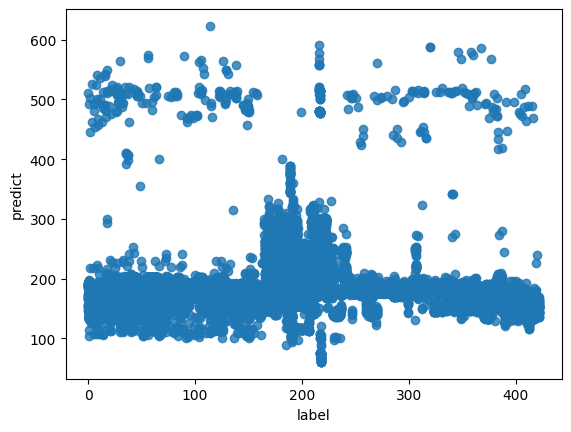

In [37]:
sns.regplot(x = 'label', y = 'predict', data = final_result)